# Data Preprocessing

Load data using pandas

In [1]:
import pandas as pd
housing = pd.read_csv("housing.csv")

Inspect the data

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Findings
Each row represents one district, and there are ten attributes describing a district.

Get a quick description of the data, in particular the total number of rows, each attribute’s type, and the number of nonnull values

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Find out what categories exist under ocean_proximity, and how many districts belong to each category by using the value_counts() method

In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Show a summary of the numerical attributes

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute

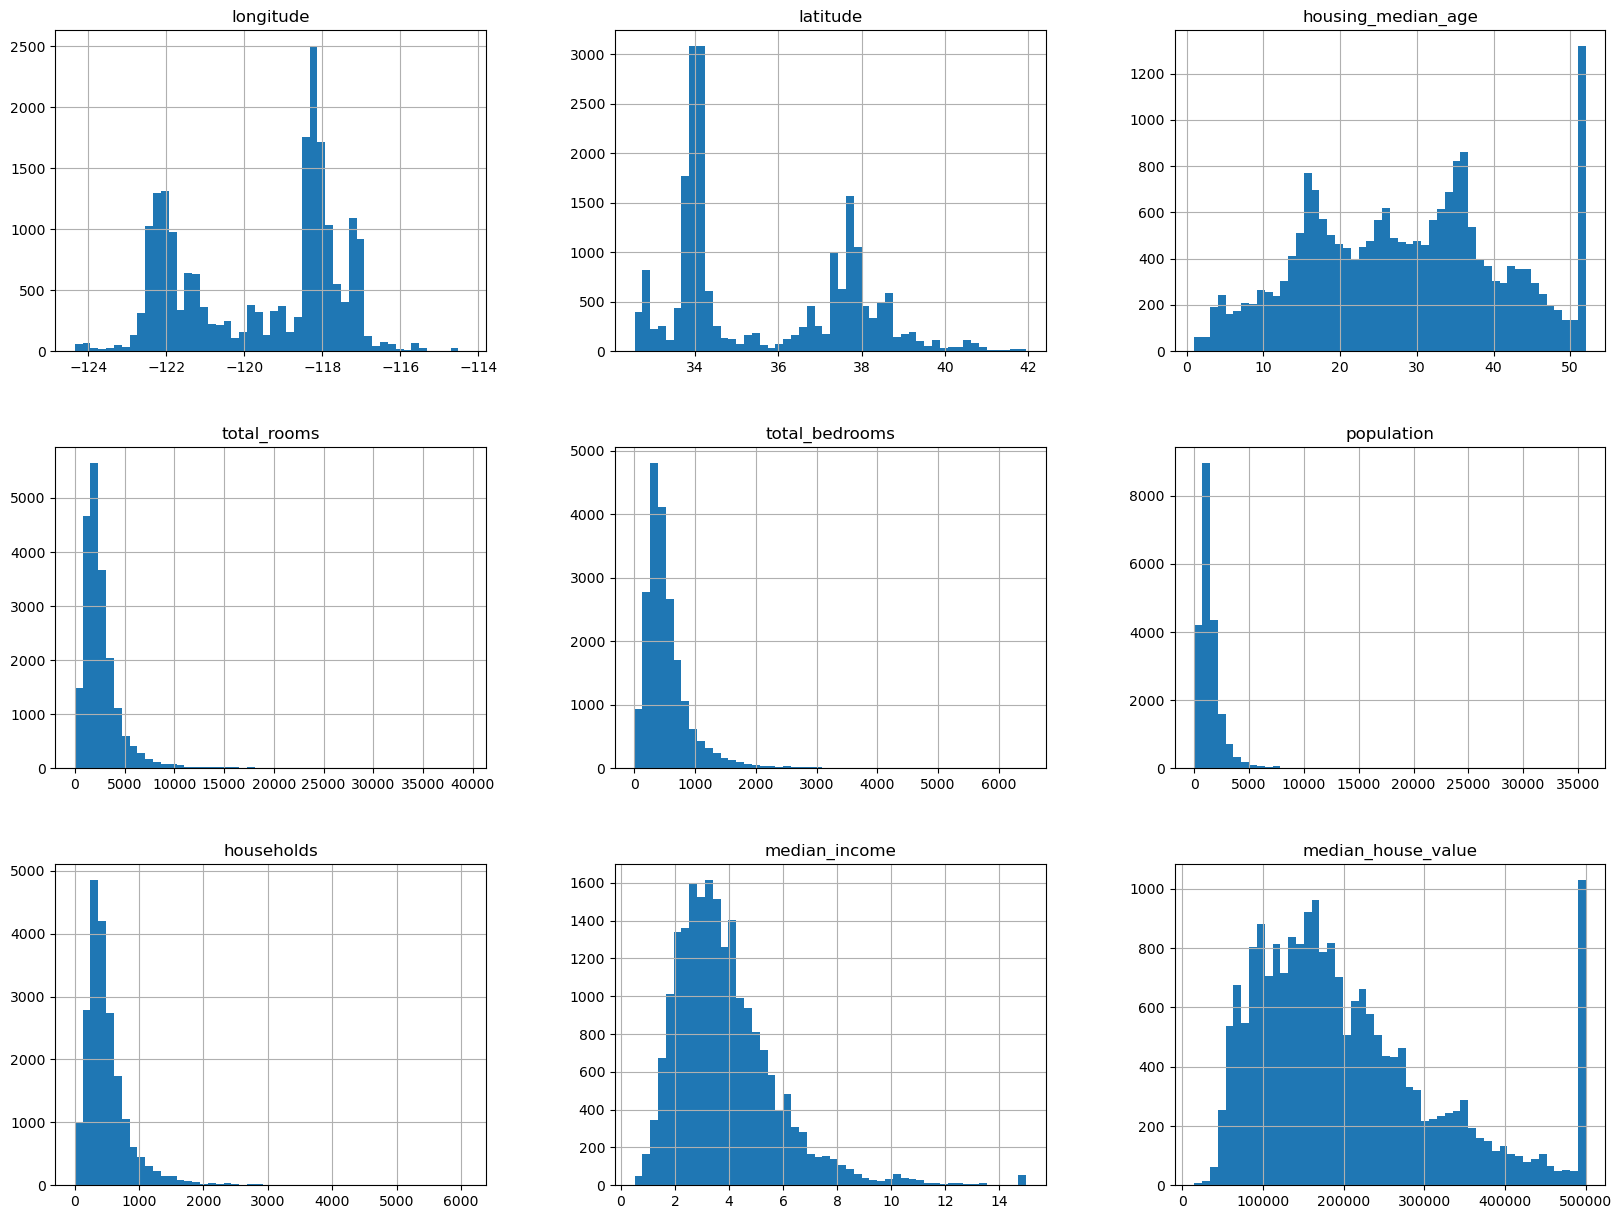

In [10]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

Separate out the test set early

Perform Data Snooping Bias

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Stratified Sampling

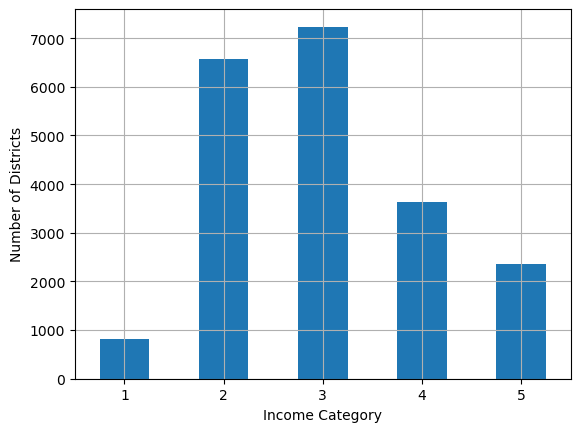

In [12]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0, 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Income Category')
plt.ylabel('Number of Districts')
plt.show()

Stratified sampling based on the income category

In [13]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

Remove Income Category Field so that the data is back to its original state

In [14]:
strat_train_set = strat_train_set.drop('income_cat', axis=1)
strat_test_set = strat_test_set.drop('income_cat', axis=1)

Visualize the data

Create a copy so that we can play around with it without harming the training set

In [15]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

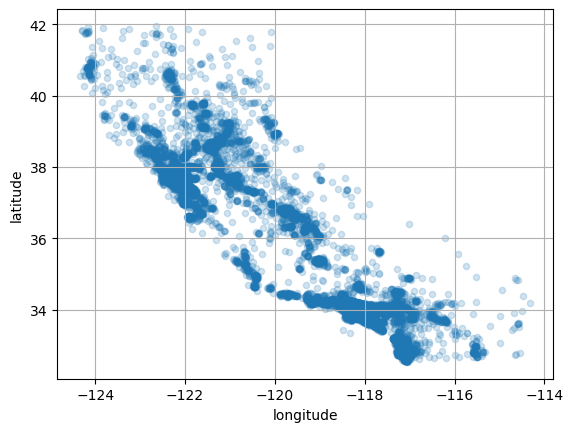

In [16]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True, alpha=0.2)

Let's look at the housing prices next

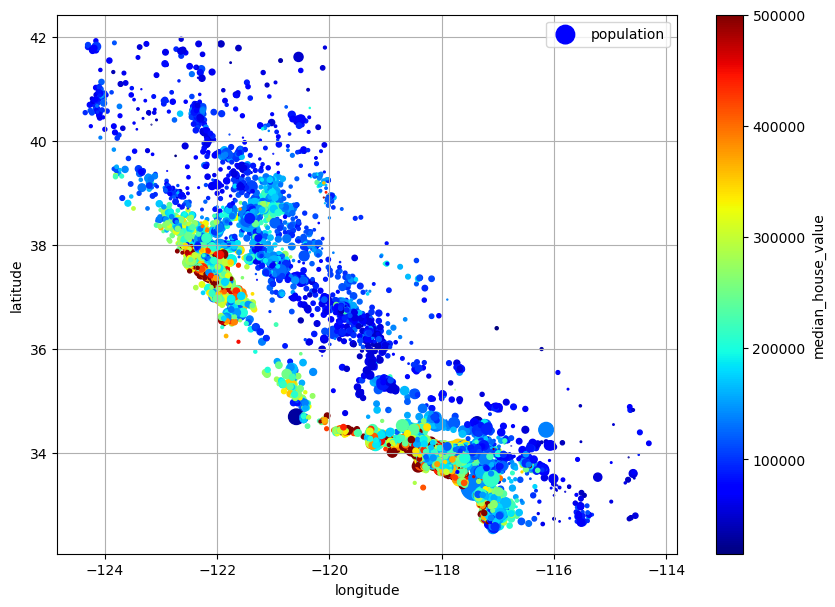

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"] / 100, label="population", c="median_house_value", cmap="jet",
             colorbar=True, legend=True, sharex=False, figsize=(10,7))
plt.show()

Examine Correlation since the dataset is not too large using Pearson's r correlation coefficient between every pair of attributes using the corr() method

In [21]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up.
When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north).

Examine Correlation with Scatter Plots
Another way to check for correlation between attributes is to use the pandas scatter_matrix() function, which plots every numerical attribute against every other numerical attribute.
Since there are now 9 numerical attributes, you would get 81 plots, which would not fit on a page—so let’s just focus on a few promising attributes that seem most correlated with the median housing value

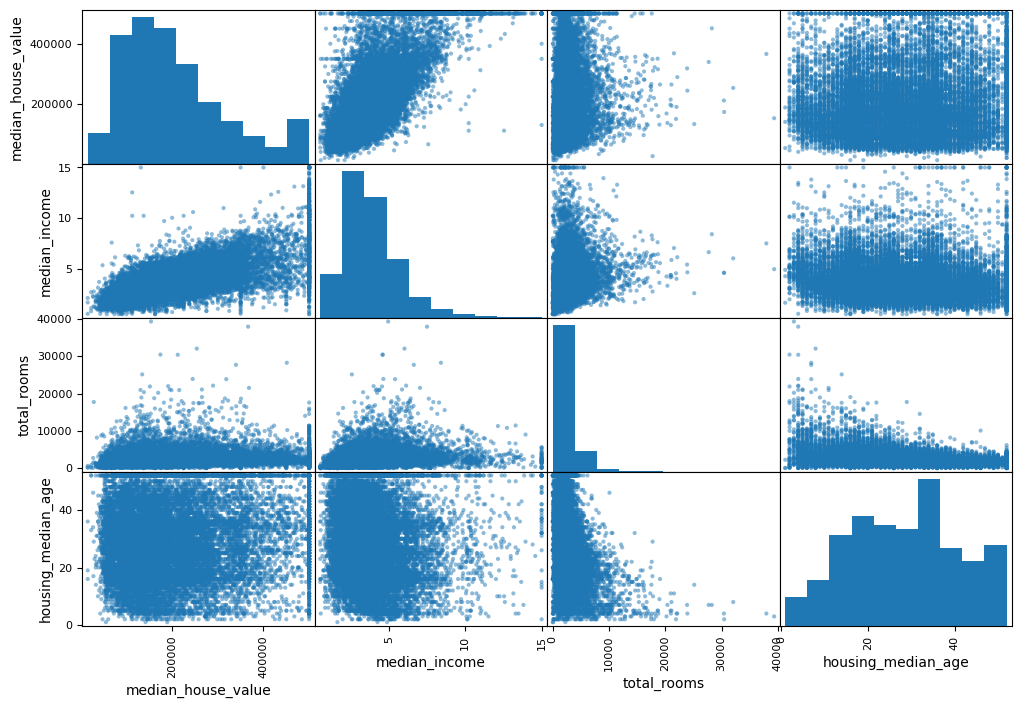

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

Median income seems to have the strongest correlation with our target attribute so let’s zoom in on it.

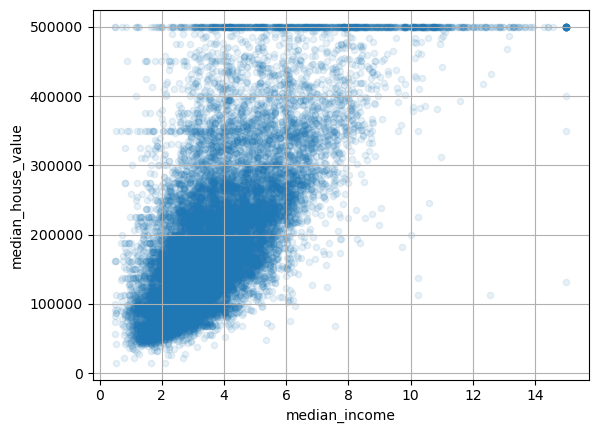

In [23]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

What the plot reveals

This plot reveals that the correlation is indeed very strong; you can clearly see the upward trend, and the points are not too dispersed.
Second, the price cap that we mentioned earlier is clearly visible as a horizontal line at $500,000.
But this plot reveals other less obvious straight lines: a horizontal line around $450,000, another around $350,000, perhaps one around
$280,000, and a few more below that.
You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

Experimenting with Attribute Combinations

Some attributes have little value until they are combined with others.
For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. What you really
want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms.
And the population per household also seems like an interesting attribute combination to look at.

In [24]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [25]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [26]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

Comparing Correlations

From the correlation matrix, we see that some of the combined attributes offer new insights.
We see that the new rooms per household attribute has a stronger positive correlation with the target than rooms alone or bedrooms alone.
We also see that bedrooms per room has a significant negative correlation with the target. That is, a higher bedrooms to rooms ratio suggests a lower house value.

Prepare the Data for Machine Learning

Let’s revert to a clean training set (by copying strat_train_set once again; we’re abandoning the combined attributes).
Let’s also separate the predictors and the labels, since we don’t necessarily want to apply the same transformations to the predictors and the target values:

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Cleaning the Data

We saw earlier that the total_bedrooms attribute has some missing values, so let’s fix this.
You have three options:

    • Get rid of the corresponding districts.

    • Get rid of the whole attribute.

    • Set the values to some value (zero, the mean, the median, etc.).

You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna() methods. 

In [ ]:
housing.dropna(subset=["total_bedrooms"], inplace=True) #option1

housing.drop("total_bedrooms", axis=1) #option2

median = housing["total_bedrooms"].median() #option3
housing["total_bedrooms"].fillna(median, inplace=True)

Cleaning the Data

Let’s go for option 3 since it is the least destructive, but instead of the code above, we will use a handy Scikit-Learn class : SimpleImputer.

The benefit is that it will store the median value of each feature: this will make it possible to impute missing values not only on the training
set, but also on the validation set, the test set, and any new data fed to the model.

First, you need to create a SimpleImputer instance, specifying that you want to replace each attribute’s missing values with the median of that attribute:

Since the median can only be computed on numerical attributes, you need to create a copy of the data without the text attribute ocean_proximity.

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
housing_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        1.79500000e+05,  5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [28]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index=housing_num.index)


Handling Text and Categorical Attributes

So far we have only dealt with numerical attributes, but now let’s look at text attributes.

In this dataset, there is just one: the ocean_proximity attribute. Let’s look at its value for the first 10 instances

In [29]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


Converting Categories to Numbers

Most Machine Learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s OneHotEncoder class.

One hot encoding creates binary attribute for each category. The category that is true for a given instance will be 1 and all the others 0.

In [30]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

One hot encoding produces a sparse matrix

Notice that the output is a sparse matrix.
This is very useful when you have categorical attributes with thousands of categories.

After one-hot encoding, we get a matrix with thousands of rows full of 0s except for a single 1 per row.

Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the nonzero elements and their location. 

Feature Scaling

One of the most important transformations you need to apply to your data is feature scaling.

Machine Learning algorithms generally don’t perform well when the input numerical attributes have very different scales.

This is the case for the housing data: the total number of rooms ranges from about 2 to 39,320, while the median incomes only range from 0 to 15.

There are two common ways to get all attributes to have the same scale: 
    
    - min-max scaling
    
    - standardization.

Min-Max Scaling
Min-max scaling (or normalization) is the simplest: values are shifted and rescaled so that they end up ranging from 0 to 1.

We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

Standardization

Standardization is different: first it subtracts the mean value (so standardized values have a zero mean), then it divides the result by the standard deviation (so standardized values have a standard deviation equal to 1).

Unlike min-max scaling, standardization does not bound values to a specific range.

However, standardization is much less affected by outliers.

For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from
0–15 down to 0–0.15, whereas standardization would not be much affected.

Scikit-Learn provides a transformer called StandardScaler for standardization.

In [31]:
housing_num = housing.drop('ocean_proximity', axis=1) # Apply scaling to numeric values only
housing_num_columns = housing_num.columns
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,6.096552,0.182692,3.167241


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_tr = scaler.fit_transform(housing_num) # Returns a Numpy array

In [33]:
housing_tr_df = pd.DataFrame(housing_tr, columns=housing_num.columns, index=housing_num.index)
housing_tr_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
12655,-0.941350,1.347438,0.027564,0.584777,0.635123,0.732602,0.556286,-0.893647,-1.166015,0.017395,-0.123555,0.006223
15502,1.171782,-1.192440,-1.722018,1.261467,0.775677,0.533612,0.721318,1.292168,0.627451,0.569256,-0.909061,-0.040811
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545045,-0.674675,-0.524407,-0.525434,-1.074397,-0.018024,-0.370854,-0.075371
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.038567,-0.467617,-0.037297,-0.865929,-0.816829,-0.595140,1.109036,-0.106803
20496,0.437431,-0.635818,-0.131489,0.427179,0.269198,0.374060,0.220898,0.325752,0.270486,0.251241,-0.526010,0.006109


In [34]:
housing_tr_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.635400e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.635400e+04,1.651200e+04
mean,-5.214135e-15,2.783895e-16,1.232965e-16,-3.636868e-17,1.315581e-16,1.875250e-17,-2.772868e-17,1.002677e-16,5.364195e-17,-5.489435e-17,-1.702817e-16,-4.521480e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000030e+00
min,-2.385075e+00,-1.449702e+00,-2.199176e+00,-1.223624e+00,-1.291435e+00,-1.269855e+00,-1.317625e+00,-1.772289e+00,-1.659550e+00,-1.650308e+00,-1.967239e+00,-2.075331e-01
25%,-1.111200e+00,-7.948529e-01,-8.472270e-01,-5.516115e-01,-5.813956e-01,-5.698016e-01,-5.803051e-01,-6.871505e-01,-7.537337e-01,-3.822298e-01,-6.547861e-01,-5.741455e-02
50%,5.323472e-01,-6.451732e-01,2.756357e-02,-2.354803e-01,-2.469742e-01,-2.291867e-01,-2.369322e-01,-1.755153e-01,-2.377342e-01,-7.966877e-02,-1.715994e-01,-2.406740e-02
75%,7.821265e-01,9.732389e-01,6.637749e-01,2.424578e-01,2.643513e-01,2.682904e-01,2.794582e-01,4.564298e-01,4.917525e-01,2.358519e-01,4.695973e-01,1.596537e-02
max,2.630493e+00,2.951818e+00,1.856671e+00,1.716156e+01,1.375268e+01,3.071120e+01,1.293901e+01,5.839873e+00,2.532422e+00,5.225448e+01,1.371870e+01,1.070603e+02


One-hot encoded ocean proximity

The ocean_proximity feature was one_hot encoded separately

We need to attach it to the train and test sets

We will repeat the encoding using the easier get_dummies method of pandas and then attach.

In [ ]:
# Bring back ocean_proximity converted to one hot encoding
ocean_proximity_one_hot = pd.get_dummies(housing.ocean_proximity) # housing['ocean_proximity']
housing_tr = pd.concat([housing_tr_df, ocean_proximity_one_hot], axis=1)

ocean_proximity_one_hot_test = pd.get_dummies(test_set.ocean_proximity)
test_tr = pd.concat([test_tr_df, ocean_proximity_one_hot_test], axis=1)